## Example Notebook of the Social Thermodynamics Library

This notebook, goes through the main functionality of the Social Thermodynamics Library (STDL).
The library helps to analyse graphs that evolve over time by projecting onto the main layer and subsequently calculating the distances between entities the entities of that layer.

In [1]:
# install packages
#!conda install --yes --file requirements.txt

In [2]:
# import library
from STDL import STDC

In [3]:
# initialize class where data is generated randomly
stdc = STDC()

In [4]:
# inspect randomly generated data
stdc.raw_data

,id1,id2,timestamp
0,L1_0,L2_19,2020-01-02 01:00:33.486392
1,L1_2,L2_5,2020-01-02 01:03:36.713219
2,L1_2,L2_8,2020-01-02 06:31:10.013017
3,L1_0,L2_0,2020-01-04 05:08:01.427932
4,L1_0,L2_4,2020-01-06 15:26:51.399850
...,...,...,...
995,L1_0,L2_4,2024-12-17 17:18:38.230133
996,L1_2,L2_7,2024-12-21 08:44:11.425860
997,L1_1,L2_3,2024-12-28 01:09:58.894370
998,L1_0,L2_15,2024-12-29 07:13:52.283859


In [5]:
# allocates timeframe bins based on user specified timeframe
stdc.calculate_timeframe()

,id1,id2,timestamp,timeframe
0,L1_0,L2_19,2020-01-02 01:00:33.486392,2020
1,L1_2,L2_5,2020-01-02 01:03:36.713219,2020
2,L1_2,L2_8,2020-01-02 06:31:10.013017,2020
3,L1_0,L2_0,2020-01-04 05:08:01.427932,2020
4,L1_0,L2_4,2020-01-06 15:26:51.399850,2020
...,...,...,...,...
995,L1_0,L2_4,2024-12-17 17:18:38.230133,2024
996,L1_2,L2_7,2024-12-21 08:44:11.425860,2024
997,L1_1,L2_3,2024-12-28 01:09:58.894370,2024
998,L1_0,L2_15,2024-12-29 07:13:52.283859,2024


In [6]:
# outputs a biadjacency matrix with unique entities of main layer and timeframe as multiindex
stdc.calculate_biadjacency_matrix()

id2             L2_0  L2_1  L2_10  L2_11  L2_12  L2_13  L2_14  L2_15  L2_16  \
id1  timeframe                                                                
L1_0 2020        6.0   4.0    5.0    5.0    1.0    2.0    2.0    3.0    3.0   
     2021        3.0   4.0    1.0    3.0    4.0    5.0    5.0    2.0    4.0   
     2022        5.0   1.0    3.0    6.0    3.0    1.0    7.0    3.0    4.0   
     2023        2.0   6.0    5.0    2.0    3.0    6.0    5.0    3.0    0.0   
     2024        4.0   2.0    3.0    4.0    2.0    2.0    6.0    5.0    1.0   
L1_1 2020        3.0   3.0    1.0    4.0    2.0    1.0    4.0    5.0    5.0   
     2021        0.0   5.0    6.0    4.0    5.0    5.0    5.0    2.0    3.0   
     2022        1.0   6.0    5.0    4.0    4.0    3.0    5.0    3.0    1.0   
     2023        2.0   2.0    2.0    5.0    2.0    3.0    4.0    4.0    6.0   
     2024        2.0   3.0    4.0    3.0    5.0    2.0    2.0    4.0    2.0   
L1_2 2020        4.0   4.0    5.0    2.0    2.0    1.0    1.0    2.0    0.0   
     2021        1.0   4.0    2.0    6.0    4.0    6.0    2.0    3.0    1.0   
     2022        2.0   7.0    5.0    1.0    1.0    3.0    4.0    2.0    2.0   
     2023        4.0   0.0    4.0    5.0    2.0    7.0    5.0    6.0    4.0   
     2024        5.0   1.0    2.0    4.0    3.0    2.0    5.0    2.0    2.0   

id2             L2_17  L2_18  L2_19  L2_2  L2_3  L2_4  L2_5  L2_6  L2_7  L2_8  \
id1  timeframe                                                                  
L1_0 2020         4.0    1.0    7.0   6.0   4.0   5.0   1.0   2.0   3.0   1.0   
     2021         6.0    7.0    5.0   2.0   2.0   3.0   1.0   4.0   3.0   2.0   
     2022         3.0    4.0    3.0   3.0   3.0   0.0   1.0   4.0   3.0   6.0   
     2023         3.0    5.0    5.0   3.0   2.0   8.0   1.0   5.0   2.0   4.0   
     2024         1.0    4.0    5.0   1.0   2.0   5.0   0.0   1.0   1.0   2.0   
L1_1 2020         0.0    0.0    5.0   3.0   2.0   2.0   1.0   2.0   7.0   2.0   
     2021         3.0    3.0    4.0   6.0   3.0   7.0   4.0   3.0   5.0   1.0   
     2022         4.0    6.0    1.0   4.0   2.0   3.0   2.0   3.0   6.0   5.0   
     2023         4.0    4.0    2.0   5.0   3.0   3.0   4.0   4.0   2.0   3.0   
     2024         3.0    3.0    2.0   1.0   5.0   1.0   0.0   2.0   2.0   5.0   
L1_2 2020         6.0    5.0    4.0   5.0   5.0   3.0   1.0   6.0   1.0   4.0   
     2021         6.0    2.0    2.0   2.0   3.0   3.0   6.0   3.0   4.0   3.0   
     2022         2.0    3.0    4.0   2.0   2.0   3.0   6.0   7.0   4.0   3.0   
     2023         5.0    5.0    4.0   4.0   4.0   3.0   5.0   6.0   2.0   9.0   
     2024         4.0    5.0    2.0   5.0   3.0   2.0   2.0   2.0   3.0   4.0   

id2             L2_9  
id1  timeframe        
L1_0 2020        3.0  
     2021        5.0  
     2022        1.0  
     2023        3.0  
     2024        3.0  
L1_1 2020        3.0  
     2021        4.0  
     2022        1.0  
     2023        5.0  
     2024        5.0  
L1_2 2020        6.0  
     2021        1.0  
     2022        3.0  
     2023        1.0  
     2024        3.0

In [7]:
# project onto main layer and calculate positions
stdc.calculate_positions()

,id1,L1_0,L1_1,L1_2
id1,timeframe,,,
L1_0,2020,0.000000,0.187378,0.166947
L1_1,2020,0.187378,0.000000,0.394528
L1_2,2020,0.166947,0.394528,0.000000
L1_0,2021,0.000000,0.167355,0.198369
L1_1,2021,0.167355,0.000000,0.153432
L1_2,2021,0.198369,0.153432,0.000000
L1_0,2022,0.000000,0.174413,0.288245
L1_1,2022,0.174413,0.000000,0.161935
L1_2,2022,0.288245,0.161935,0.000000


In [8]:
# initliaze STDC and specify dimensionality of positions
stdc_r = STDC(dimensions=2)

# calculate dimensionality reduced positions
stdc_r.calculate_reduced_positions()

,,0,1
id1,timeframe,,
L1_0,2020,-0.104385,-0.181929
L1_1,2020,0.085260,0.200977
L1_2,2020,-0.126084,-0.015347
L1_0,2021,0.069250,-0.136029
L1_1,2021,0.160152,0.068555
L1_2,2021,-0.189126,0.049169
L1_0,2022,0.057082,-0.156906
L1_1,2022,0.120964,0.108414
L1_2,2022,-0.164325,0.083266


In [9]:
# calculate average reduced dimensionality positions between consecutive timeframes
stdc_r.calculate_aligned_reduced_positions()

0         1
id1  t1   t2                      
L1_0 2020 2021 -0.017568 -0.158979
     2021 2022  0.063166 -0.146468
     2022 2023  0.068972 -0.144594
     2023 2024  0.074566 -0.131841
L1_1 2020 2021  0.122706  0.134766
     2021 2022  0.140558  0.088484
     2022 2023  0.143293  0.083582
     2023 2024  0.149323  0.064617
L1_2 2020 2021 -0.157605  0.016911
     2021 2022 -0.176725  0.066217
     2022 2023 -0.178861  0.067908
     2023 2024 -0.178283  0.057139

In [10]:
# calculate graph based on similarities
stdc.calculate_graphs()

{'2020': <Graph object, undirected, with 3 vertices and 3 edges, 1 internal edge property, at 0x1966c2a50>,
 '2021': <Graph object, undirected, with 3 vertices and 3 edges, 1 internal edge property, at 0x1af8a6210>,
 '2022': <Graph object, undirected, with 3 vertices and 3 edges, 1 internal edge property, at 0x1af8a65d0>,
 '2023': <Graph object, undirected, with 3 vertices and 3 edges, 1 internal edge property, at 0x1af8fc510>,
 '2024': <Graph object, undirected, with 3 vertices and 3 edges, 1 internal edge property, at 0x1af8fcd60>}

In [11]:
# calculate communities of graphs
stdc.calculate_communities()

{'2020': <VertexPropertyMap object with value type 'int32_t', for Graph 0x1966c2a50, at 0x191b57f20>,
 '2021': <VertexPropertyMap object with value type 'int32_t', for Graph 0x1af8a6210, at 0x191b57110>,
 '2022': <VertexPropertyMap object with value type 'int32_t', for Graph 0x1af8a65d0, at 0x1af9133f0>,
 '2023': <VertexPropertyMap object with value type 'int32_t', for Graph 0x1af8fc510, at 0x1af913e70>,
 '2024': <VertexPropertyMap object with value type 'int32_t', for Graph 0x1af8fcd60, at 0x1af8aa820>}

In [12]:
# calculate modularities of communities
stdc.calculate_modularities()

,timeframe,modularity
0,2020,0.000000e+00
1,2021,0.000000e+00
2,2022,4.089975e-16
3,2023,0.000000e+00
4,2024,0.000000e+00


In [13]:
# calculate average between modularities of consecutive timeframes
stdc.calculate_aligned_modularities()

,t1,t2,modularity
0,2020,2021,0.000000e+00
1,2021,2022,2.044987e-16
2,2022,2023,2.044987e-16
3,2023,2024,0.000000e+00


In [14]:
# calculated the difference in reduced positions between consecutive timeframes
stdc.calculate_velocities()

id1                 L1_0      L1_1      L1_2
id1  t1   t2                                
L1_0 2020 2021  0.000000 -0.020023  0.031422
     2021 2022  0.000000  0.007058  0.089876
     2022 2023  0.000000  0.047801 -0.092588
     2023 2024  0.000000 -0.002253 -0.021962
L1_1 2020 2021 -0.020023  0.000000 -0.241096
     2021 2022  0.007058  0.000000  0.008503
     2022 2023  0.047801  0.000000 -0.044949
     2023 2024 -0.002253  0.000000  0.053228
L1_2 2020 2021  0.031422 -0.241096  0.000000
     2021 2022  0.089876  0.008503  0.000000
     2022 2023 -0.092588 -0.044949  0.000000
     2023 2024 -0.021962  0.053228  0.000000

### Statistics

In [15]:
# calculate_basic_ts_stats() outputs two statistics dataframes
ps, vs = stdc.calculate_basic_ts_stats()

display(ps)
display(vs)

id1            L1_0                      L1_1                      L1_2  \
               mean       var count      mean       var count      mean   
t1   t2                                                                   
2020 2021  0.120008  0.010808     3  0.150449  0.019310     3  0.152213   
2021 2022  0.138064  0.015607     3  0.109522  0.009040     3  0.133664   
2022 2023  0.146755  0.016629     3  0.112591  0.010373     3  0.127137   
2023 2024  0.135254  0.014052     3  0.121562  0.012584     3  0.109425   

id1                        
                var count  
t1   t2                    
2020 2021  0.019461     3  
2021 2022  0.015232     3  
2022 2023  0.014749     3  
2023 2024  0.009402     3

id1            L1_0                      L1_1                      L1_2  \
               mean       var count      mean       var count      mean   
t1   t2                                                                   
2020 2021  0.003800  0.000672     3 -0.087040  0.017900     3 -0.069891   
2021 2022  0.032311  0.002498     3  0.005187  0.000021     3  0.032793   
2022 2023 -0.014929  0.005094     3  0.000951  0.002151     3 -0.045846   
2023 2024 -0.008072  0.000146     3  0.016992  0.000986     3  0.010422   

id1                        
                var count  
t1   t2                    
2020 2021  0.022230     3  
2021 2022  0.002462     3  
2022 2023  0.002144     3  
2023 2024  0.001495     3

In [16]:
# calculates thermodynamic statistics
stdc.calculate_thermodyn_ts_stats()

,,Vol,Temp,V_CoM,Mod,CNT
t1,t2,,,,,
2020,2021,0.002015,0.040803,0.111692,0.000000e+00,3.0
2021,2022,0.001466,0.004980,0.046328,2.044987e-16,3.0
2022,2023,0.001595,0.009389,0.048225,2.044987e-16,3.0
2023,2024,0.001289,0.002627,0.021506,0.000000e+00,3.0


### Visualisations

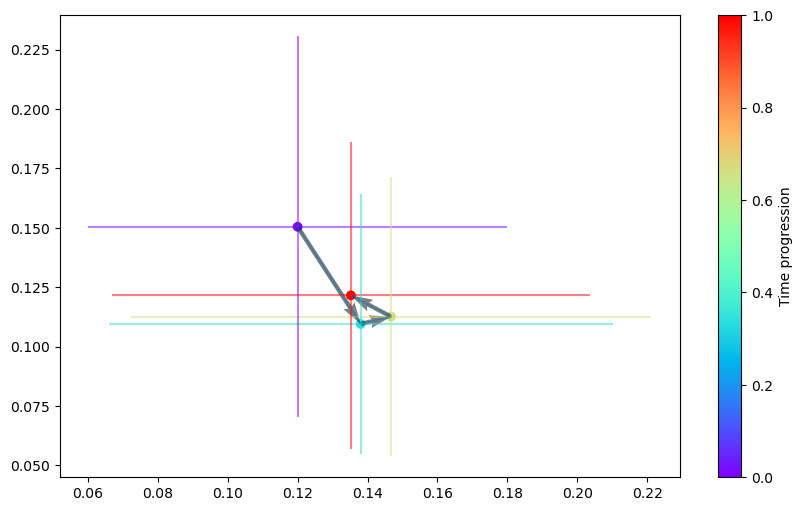

In [17]:
# outputs the trajectory of mean reduced positions along with error
stdc.plot_center_of_mass_trajectory()

In [18]:
# evolution of reduced positions over all timeframes
stdc.plot_reduced_positions_animation()